In [1]:
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from datetime import datetime, timedelta

today = datetime.strftime(datetime.now(), "%m-%d-%Y")
yesterday = datetime.strftime(datetime.now() - timedelta(1), "%m-%d-%Y")
yesterday2 = datetime.strftime(datetime.now() - timedelta(1), "%m/%d/%y")

In [3]:
print(yesterday)

04-21-2021


In [4]:
import urllib
from urllib.error import HTTPError

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# NY Times
url_counties = (
    "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
)

url_states = (
    "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
)


# Johns Hopkins CSSE
jh = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"

try:
    urllib.request(jh + today + ".csv")
    data2 = pd.read_csv(jh + today + ".csv")
except TypeError:
    data2 = pd.read_csv(jh + yesterday + ".csv")


data_c = pd.read_csv(url_counties)
data_s = pd.read_csv(url_states)

In [5]:
# # Latest Unemployment Claims

# latest_claims = int(master_f.claims[-1:])
# # latest_claims = master_f.claims
# # latest_claims = " ".join([str(elem) for elem in latest_claims])

# print(latest_claims)

In [6]:
# # Creating a Data Frame with both COV-19 cases and Unemployment Claims
# latest = pd.DataFrame(
#     {"date": [yesterday2], "cases": [int(usa_total)], "claims": [latest_claims]}
# )

In [7]:
# master_f = master_f.append(latest, ignore_index=True)

In [8]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22894 entries, 0 to 22893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    22894 non-null  object
 1   state   22894 non-null  object
 2   fips    22894 non-null  int64 
 3   cases   22894 non-null  int64 
 4   deaths  22894 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 894.4+ KB


In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3812 non-null   object 
 3   Country_Region       3983 non-null   object 
 4   Last_Update          3983 non-null   object 
 5   Lat                  3895 non-null   float64
 6   Long_                3895 non-null   float64
 7   Confirmed            3983 non-null   int64  
 8   Deaths               3983 non-null   int64  
 9   Recovered            706 non-null    float64
 10  Active               704 non-null    float64
 11  Combined_Key         3983 non-null   object 
 12  Incident_Rate        3895 non-null   float64
 13  Case_Fatality_Ratio  3941 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 435.8+ KB


In [10]:
# Print Counties
latest_date = data_c[-1:]
latest_date = latest_date.date
latest_date = " ".join([str(elem) for elem in latest_date])

print(latest_date)

2021-04-22


In [11]:
pop_florida = pd.read_csv(
    "data/florida_county_population.csv"
)  # Scraped from https://en.wikipedia.org/wiki/List_of_counties_in_Florida


fl_latest = data_c.query("state == 'Florida'")
# fl_latest = fl_latest.tail(67)
fl_latest.drop(fl_latest[fl_latest["date"] != latest_date].index, inplace=True)
fl_latest.drop(fl_latest[fl_latest["county"] == "Unknown"].index, inplace=True)

popul_fl_counties = list(pop_florida["population"])
fl_latest["population"] = popul_fl_counties
fl_latest["mortality_rate"] = round(fl_latest["deaths"] / fl_latest["cases"], 4)
fl_latest["cases_rate_per_population"] = round(
    fl_latest["cases"] / fl_latest["population"], 4
)
fl_latest
fl_latest.to_csv("data/fl_latest.csv", index=False)
fl_latest.sort_values(by=["cases"], ascending=False).head(15).reset_index(drop=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,date,county,state,fips,cases,deaths,population,mortality_rate,cases_rate_per_population
0,2021-04-22,Miami-Dade,Florida,12086.0,475230,6077.0,2662874,0.0128,0.1785
1,2021-04-22,Broward,Florida,12011.0,231050,2848.0,1780172,0.0123,0.1298
2,2021-04-22,Palm Beach,Florida,12099.0,140372,2738.0,1335187,0.0195,0.1051
3,2021-04-22,Orange,Florida,12095.0,133210,1230.0,1169107,0.0092,0.1139
4,2021-04-22,Hillsborough,Florida,12057.0,131831,1671.0,1267775,0.0127,0.1040
5,2021-04-22,Duval,Florida,12031.0,95943,1357.0,937934,0.0141,0.1023
6,2021-04-22,Pinellas,Florida,12103.0,77394,1587.0,917398,0.0205,0.0844
7,2021-04-22,Lee,Florida,12071.0,67406,949.0,631330,0.0141,0.1068
8,2021-04-22,Polk,Florida,12105.0,65791,1292.0,609492,0.0196,0.1079
9,2021-04-22,Osceola,Florida,12097.0,42927,496.0,276163,0.0116,0.1554


In [12]:
pop_states = pd.read_csv(
    "data/states_populations.csv"
)  # Scraped from https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population
top_states = data_s[(data_s.date == latest_date)].copy()

top_states["population"] = list(pop_states["population"])
top_states["mortality_rate"] = round(top_states["deaths"] / top_states["cases"], 4)
top_states["cases_rate_per_population"] = round(
    top_states["cases"] / top_states["population"], 4
)
top_states.sort_values(by=["cases"], ascending=False).reset_index(drop=True)

,date,state,fips,cases,deaths,population,mortality_rate,cases_rate_per_population
0,2021-04-22,California,6,3727552,61251,39512223,0.0164,0.0943
1,2021-04-22,Texas,48,2868158,49984,28995881,0.0174,0.0989
2,2021-04-22,Florida,12,2191030,34695,21477737,0.0158,0.1020
3,2021-04-22,New York,36,2016244,51299,19453561,0.0254,0.1036
4,2021-04-22,Illinois,17,1316497,24056,12671821,0.0183,0.1039
5,2021-04-22,Pennsylvania,42,1128144,25934,12801989,0.0230,0.0881
6,2021-04-22,Georgia,13,1065319,19258,10617423,0.0181,0.1003
7,2021-04-22,Ohio,39,1060119,19033,11689100,0.0180,0.0907
8,2021-04-22,New Jersey,34,990580,25282,8882190,0.0255,0.1115
9,2021-04-22,North Carolina,37,961474,12534,10488084,0.0130,0.0917


In [13]:
# Counties in the US with over 4000 cases
top_counties = data_c[(data_c.cases > 4000) & (data_c.date == latest_date)]
top_counties.sort_values(by=["cases"], ascending=False).reset_index(drop=True).head(15)

,date,county,state,fips,cases,deaths
0,2021-04-22,Los Angeles,California,6037.0,1231024,23736.0
1,2021-04-22,New York City,New York,NaN,914045,32253.0
2,2021-04-22,Maricopa,Arizona,4013.0,532809,9803.0
3,2021-04-22,Cook,Illinois,17031.0,525854,10415.0
4,2021-04-22,Miami-Dade,Florida,12086.0,475230,6077.0
5,2021-04-22,Harris,Texas,48201.0,388423,6122.0
6,2021-04-22,Riverside,California,6065.0,297770,4555.0
7,2021-04-22,Dallas,Texas,48113.0,296606,3951.0
8,2021-04-22,San Bernardino,California,6071.0,295315,4572.0
9,2021-04-22,San Diego,California,6073.0,275695,3681.0


In [14]:
total_confirmed = lambda df: df.Confirmed.sum()
total_recovered = lambda df: df.Recovered.sum()
recovered_ratio = lambda df: df.Recovered.sum() / df.Confirmed.sum()

In [15]:
print(f"Total Confirmed: Worldwide {total_confirmed(data2):^5,}")
print(f"Total Recovered: Worldwide {total_recovered(data2):^5,}")
print(f"Recovered/Ratio: Worldwide {recovered_ratio(data2):.4f}")

Total Confirmed: Worldwide 143,842,820
Total Recovered: Worldwide 82,491,871.0
Recovered/Ratio: Worldwide 0.5735


In [16]:
for country in ["US", "Colombia"]:
    print()
    print(
        f"Total Confirmed: {country:<15} {total_confirmed(data2.loc[(data2.Country_Region == country)]):^5,}"
    )
    print(
        f"Total Recovered: {country:<15} {total_recovered(data2.loc[(data2.Country_Region == country)]):^5,}"
    )
    print(
        f"Recovered/Ratio: {country:<15} {recovered_ratio(data2.loc[(data2.Country_Region == country)]):.4f}"
    )


Total Confirmed: US              31,862,094
Total Recovered: US               0.0 
Recovered/Ratio: US              0.0000

Total Confirmed: Colombia        2,701,313
Total Recovered: Colombia        2,521,944.0
Recovered/Ratio: Colombia        0.9336


Unsurprisingly, nor the State of Florida nor the County of Miami-Dade are reporting recovered numbers.

In [17]:
for province_state in ["Capital District", "Florida"]:
    print()
    print(
        f"Total Confirmed: {province_state:<15} {total_confirmed(data2.loc[(data2.Province_State == province_state)]):^5,}"
    )
    print(
        f"Total Recovered: {province_state:<15} {total_recovered(data2.loc[(data2.Province_State == province_state)]):^5,}"
    )
    print(
        f"Recovered/Ratio: {province_state:<15} {recovered_ratio(data2.loc[(data2.Province_State == province_state)]):.4f}"
    )


Total Confirmed: Capital District 747,839
Total Recovered: Capital District 695,808.0
Recovered/Ratio: Capital District 0.9304

Total Confirmed: Florida         2,184,354
Total Recovered: Florida          0.0 
Recovered/Ratio: Florida         0.0000


In [18]:
top_countries_v2 = pd.DataFrame()
countries = []
counts = []


for c in set(data2.Country_Region.unique()):
    totals = data2.query("Country_Region == @c").Confirmed.sum()
    # print(f"{c},{totals}")
    countries.append(c)
    counts.append(totals)

top_countries_v2["country"] = countries
top_countries_v2["total_confirmed"] = counts

In [19]:
top_countries_v2.sort_values(by=["total_confirmed"], ascending=False).reset_index(
    drop=True
).head(15)

,country,total_confirmed
0,US,31862094
1,India,15930774
2,Brazil,14122795
3,France,5436229
4,Russia,4673699
5,Turkey,4446591
6,United Kingdom,4411068
7,Italy,3904899
8,Spain,3446072
9,Germany,3222888


In [20]:
# Countries with over 10000 confirmed COV-19 cases
top_countries = data2[(data2.Confirmed > 10000)]
top_countries.sort_values(by=["Confirmed"], ascending=False).reset_index(
    drop=True
).head(15)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,France,2021-04-22 04:20:53,46.227600,2.213700,5334144,101221,292859.0,4939152.0,France,8170.582272,1.897605
1,NaN,NaN,NaN,Turkey,2021-04-22 04:20:53,38.963700,35.243300,4446591,36975,3844342.0,565274.0,Turkey,5272.279097,0.831536
2,NaN,NaN,Maharashtra,India,2021-04-22 04:20:53,19.449759,76.108221,4027827,61911,3268449.0,697467.0,"Maharashtra, India",3270.820914,1.537082
3,NaN,NaN,England,United Kingdom,2021-04-22 04:20:53,52.355500,-1.174300,3840945,112005,0.0,3728940.0,"England, United Kingdom",6861.624018,2.916079
4,NaN,NaN,Sao Paulo,Brazil,2021-04-22 04:20:53,-23.550500,-46.633300,2786483,90627,2423528.0,272328.0,"Sao Paulo, Brazil",6068.250673,3.252379
5,NaN,NaN,NaN,Argentina,2021-04-22 04:20:53,-38.416100,-63.616700,2769552,60083,2424675.0,284794.0,Argentina,6127.899958,2.169412
6,NaN,NaN,NaN,Poland,2021-04-22 04:20:53,51.919400,19.145100,2718493,63473,2366230.0,288790.0,Poland,7182.924334,2.334860
7,NaN,NaN,NaN,Iran,2021-04-22 04:20:53,32.427908,53.688046,2311813,67913,1823958.0,419942.0,Iran,2752.389239,2.937651
8,NaN,NaN,NaN,Indonesia,2021-04-22 04:20:53,-0.789300,113.921300,1620569,44007,1475456.0,101106.0,Indonesia,592.478629,2.715528
9,NaN,NaN,NaN,Czechia,2021-04-22 04:20:53,49.817500,15.473000,1609861,28711,1517774.0,63376.0,Czechia,15032.810775,1.783446


In [21]:
# Total cases in Colombia
colombia = data2.query("Country_Region == 'Colombia'").reset_index(drop=True)
colombia.sort_values(by=["Confirmed"], ascending=False).reset_index(drop=True)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,Capital District,Colombia,2021-04-22 04:20:53,4.7110,-74.0721,747839,15061,695808.0,36970.0,"Capital District, Colombia",10088.800558,2.013936
1,NaN,NaN,Antioquia,Colombia,2021-04-22 04:20:53,7.1986,-75.3412,443085,8702,408789.0,25594.0,"Antioquia, Colombia",6915.529049,1.963957
2,NaN,NaN,Valle del Cauca,Colombia,2021-04-22 04:20:53,3.8009,-76.6413,227605,6972,214760.0,5873.0,"Valle del Cauca, Colombia",5085.138451,3.063202
3,NaN,NaN,Atlantico,Colombia,2021-04-22 04:20:53,10.6966,-74.8741,211891,6016,193874.0,12001.0,"Atlantico, Colombia",8356.914980,2.839196
4,NaN,NaN,Cundinamarca,Colombia,2021-04-22 04:20:53,5.0260,-74.0300,119913,3215,113627.0,3071.0,"Cundinamarca, Colombia",4107.932006,2.681110
5,NaN,NaN,Santander,Colombia,2021-04-22 04:20:53,6.6437,-73.6536,99432,3585,93140.0,2707.0,"Santander, Colombia",4551.003118,3.605479
6,NaN,NaN,Bolivar,Colombia,2021-04-22 04:20:53,8.6704,-74.0300,75949,1487,72917.0,1545.0,"Bolivar, Colombia",3668.838854,1.957893
7,NaN,NaN,Tolima,Colombia,2021-04-22 04:20:53,4.0925,-75.1545,68241,2190,65113.0,938.0,"Tolima, Colombia",5130.180944,3.209214
8,NaN,NaN,Caldas,Colombia,2021-04-22 04:20:53,5.2983,-75.2479,57322,1127,53121.0,3074.0,"Caldas, Colombia",5742.220174,1.966086
9,NaN,NaN,Magdalena,Colombia,2021-04-22 04:20:53,10.4113,-74.4057,54407,2037,50117.0,2253.0,"Magdalena, Colombia",4054.940354,3.744004


In [22]:
# Total cases in Venezuela
vzla = data2.query("Country_Region == 'Venezuela'").reset_index(drop=True)
vzla

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Venezuela,2021-04-22 04:20:53,6.4238,-66.5897,186745,1965,169685.0,15095.0,Venezuela,656.721671,1.052237


In [23]:
# Total cases in Miami
miami = data2.query("FIPS == 12086").reset_index(drop=True)
miami

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,12086.0,Miami-Dade,Florida,US,2021-04-22 04:20:53,25.611236,-80.551706,474069,6059,NaN,NaN,"Miami-Dade, Florida, US",17448.63707,1.278084


In [24]:
miami_timeline = data_c.query('county == "Miami-Dade"').reset_index(drop=True)
miami_timeline
# miami_timeline["k"] = round(top_states["deaths"] / top_states["cases"], 4)

,date,county,state,fips,cases,deaths
0,2020-03-11,Miami-Dade,Florida,12086.0,1,0.0
1,2020-03-12,Miami-Dade,Florida,12086.0,2,0.0
2,2020-03-13,Miami-Dade,Florida,12086.0,8,0.0
3,2020-03-14,Miami-Dade,Florida,12086.0,8,0.0
4,2020-03-15,Miami-Dade,Florida,12086.0,13,0.0
...,...,...,...,...,...,...
403,2021-04-18,Miami-Dade,Florida,12086.0,470667,6044.0
404,2021-04-19,Miami-Dade,Florida,12086.0,471594,6049.0
405,2021-04-20,Miami-Dade,Florida,12086.0,472940,6058.0
406,2021-04-21,Miami-Dade,Florida,12086.0,474068,6059.0


In [25]:
# Total cases in Florida
florida = data2.loc[(data2.Province_State == "Florida"), "Confirmed"].sum()
print(f"Total Cases in Florida: {florida: ,}")

Total Cases in Florida:  2,184,354


In [26]:
s_florida = data2[
    ((data2.FIPS == 12011) | (data2.FIPS == 12086) | (data2.FIPS == 12099))
].reset_index(drop=True)
s_florida

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,12011.0,Broward,Florida,US,2021-04-22 04:20:53,26.151847,-80.487256,230312,2813,NaN,NaN,"Broward, Florida, US",11794.069782,1.221387
1,12086.0,Miami-Dade,Florida,US,2021-04-22 04:20:53,25.611236,-80.551706,474069,6059,NaN,NaN,"Miami-Dade, Florida, US",17448.637070,1.278084
2,12099.0,Palm Beach,Florida,US,2021-04-22 04:20:53,26.646763,-80.465360,139846,2732,NaN,NaN,"Palm Beach, Florida, US",9343.185660,1.953578


In [27]:
# Count of total cases in South Florida
sflorida_sum = s_florida.loc[s_florida["Confirmed"] > 0, "Confirmed"].sum()
print(f"South Florida (Miami-Dade, Broward, Palm Beach): {sflorida_sum: ,}")

South Florida (Miami-Dade, Broward, Palm Beach):  844,227


In [28]:
# Proportion of South Florida cases relative to Florida
print("South Florida Proportion:", round(sflorida_sum / florida, 4))

South Florida Proportion: 0.3865


In [29]:
# Total cases in the United States
usa = data2.loc[(data2.Country_Region == "US"), "Confirmed"].sum()
print(f"Total Cases in the US: {usa: ,}")

Total Cases in the US:  31,862,094


In [30]:
# Total cases Worldwide
worldwide = data2["Confirmed"].sum()
print(f"Total Cases Worldwide: {worldwide: ,}")

Total Cases Worldwide:  143,842,820


### Consolidating cases per date

In [31]:
dates = data_s["date"].unique()

rows = len(dates)


dates_dict = {"date": list(dates)}

dates_df = pd.DataFrame(data=dates_dict)

cases_list = []

for i in dates:
    cases = data_s.loc[data_s["date"] == i, "cases"].sum()
    cases_list.append(cases)
    # print(i, cases)

cases_dict = {"cases": list(cases_list)}


cases_df = pd.DataFrame(data=cases_dict)


master = dates_df.join(cases_df)

In [32]:
# # Cases in Florida Consolidation

dates = data_s["date"].unique()

rows = len(dates)

dates_dict = {"date": list(dates)}

dates_df = pd.DataFrame(data=dates_dict)

cases_list_fl = []

for i in dates:
    cases = data_s.loc[
        ((data_s["date"] == i) & (data_s["state"] == "Florida")), "cases"
    ].sum()
    cases_list_fl.append(cases)


cases_dict_fl = {"cases": list(cases_list_fl)}


cases_df_fl = pd.DataFrame(data=cases_dict_fl)


master_fl = dates_df.join(cases_df_fl)
master_fl["date"] = pd.to_datetime(master_fl["date"])
# master_fl.tail(48)

In [33]:
# # Cases in Miami-Dade County Consolidation

dates = data_s["date"].unique()

rows = len(dates)

dates_dict = {"date": list(dates)}

dates_df = pd.DataFrame(data=dates_dict)

cases_list_mdc = []

for i in dates:
    cases = data_c.loc[
        ((data_c["date"] == i) & (data_c["fips"] == 12086)), "cases"
    ].sum()
    cases_list_mdc.append(cases)

cases_dict_mdc = {"cases": list(cases_list_mdc)}


cases_df_mdc = pd.DataFrame(data=cases_dict_mdc)

master_mdc = dates_df.join(cases_df_mdc)

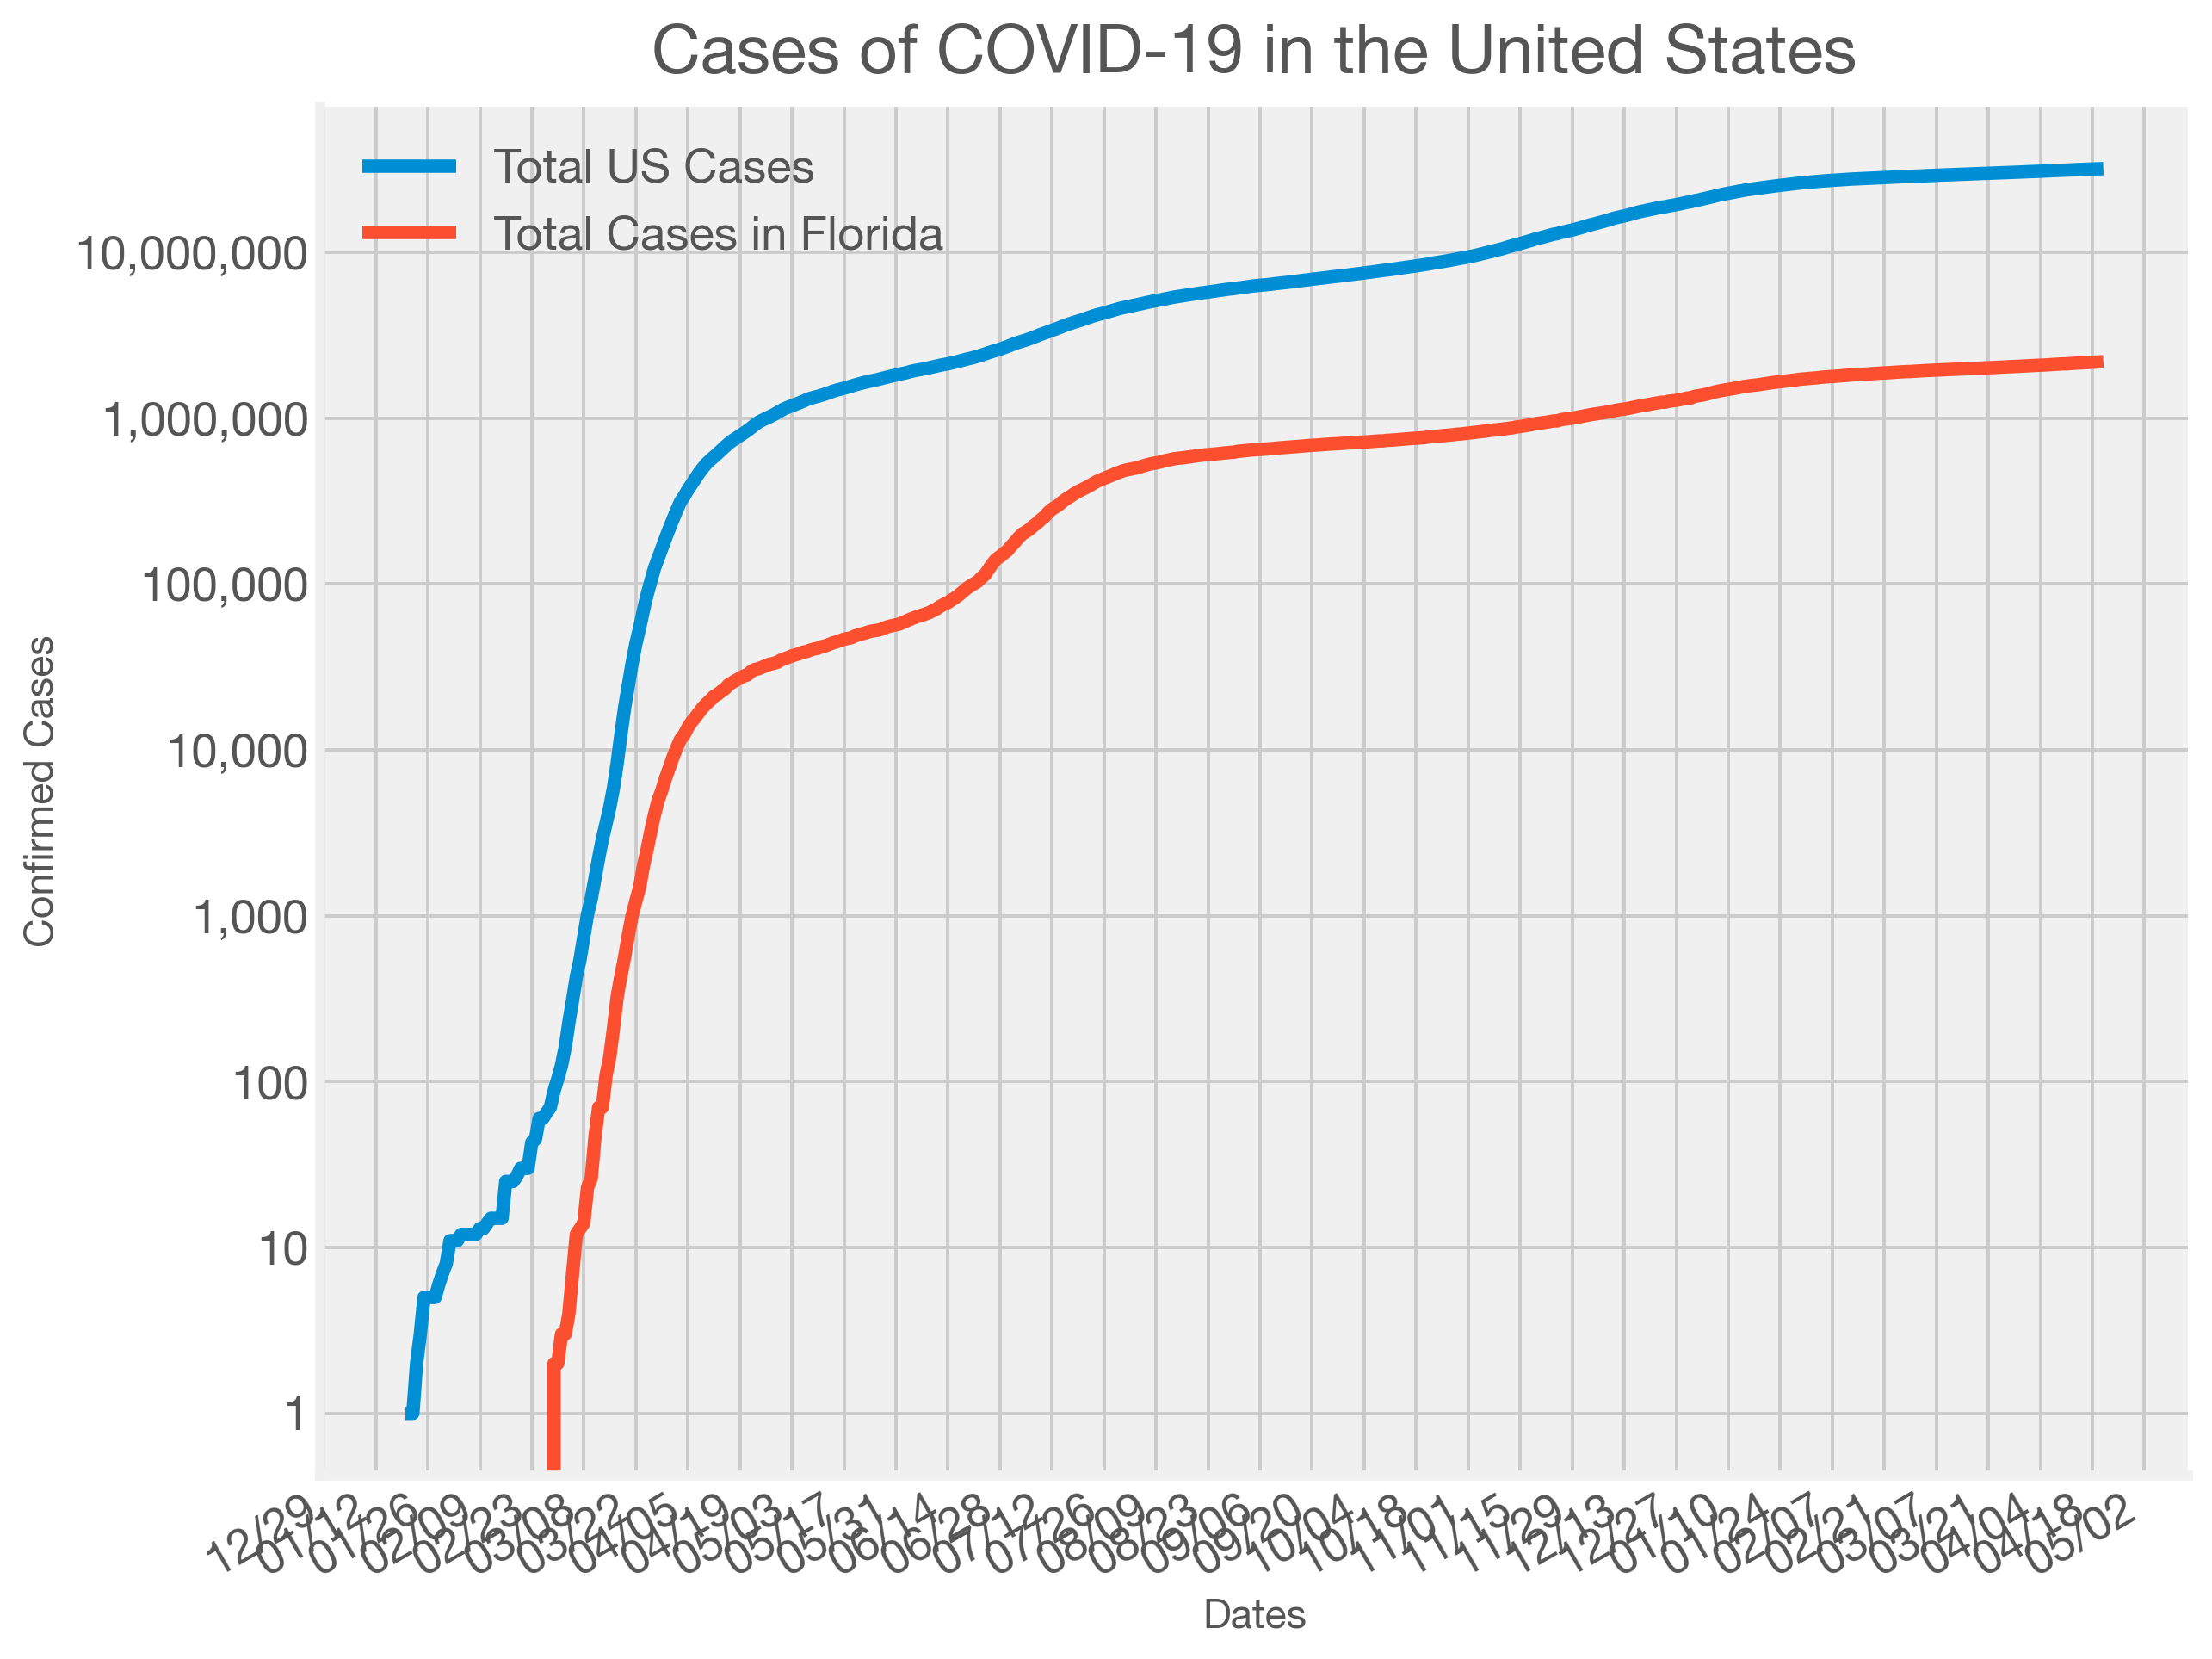

In [34]:
import datetime as dt

import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter, ScalarFormatter

plt.rcParams["figure.dpi"] = 140

# Plot the Data
plt.figure(figsize=(10, 8))
plt.style.use("fivethirtyeight")

now = dt.datetime.now() - dt.timedelta(days=1)
start = now - dt.timedelta(days=len(dates))  # + dt.timedelta(days=1)
start_fl = now - dt.timedelta(days=50)
days = mdates.drange(start, now, dt.timedelta(days=1))
days_fl = mdates.drange(start_fl, now, dt.timedelta(days=1))


# formatter = FuncFormatter(log_10_product)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(formatter))
plt.yscale("log")

# formatter = FuncFormatter(log_10_product)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(formatter))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14))

plt.plot(days, master["cases"], label="Total US Cases")
plt.plot(days, master_fl["cases"], label="Total Cases in Florida")
numbers = ["1", "10", "100", "1,000", "10,000", "100,000", "1,000,000", "10,000,000"]
plt.yticks(ticks=(1, 10, 100, 1000, 10000, 100000, 1000000, 10000000), labels=numbers)
plt.gcf().autofmt_xdate()

plt.title("Cases of COVID-19 in the United States")
plt.xlabel(r"Dates", fontsize=12)
plt.ylabel(r"Confirmed Cases", fontsize=12)


# plt.plot("date", "claims", label="Unemployment", data=master_f)
plt.legend()
plt.savefig("figures/usa_cases.svg", bbox_inches="tight")
plt.show()

In [35]:
us = pd.read_csv(
    "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv",
    parse_dates=True,
    index_col=0,
)
us["new_cases"] = us[["cases"]].diff()

In [36]:
us

,cases,deaths,new_cases
date,,,
2020-01-21,1,0,NaN
2020-01-22,1,0,0.0
2020-01-23,1,0,0.0
2020-01-24,2,0,1.0
2020-01-25,3,0,1.0
...,...,...,...
2021-04-18,31691021,566806,41612.0
2021-04-19,31761408,567291,70387.0
2021-04-20,31822125,568123,60717.0


<AxesSubplot:title={'center':'New Deaths'}, xlabel='date'>

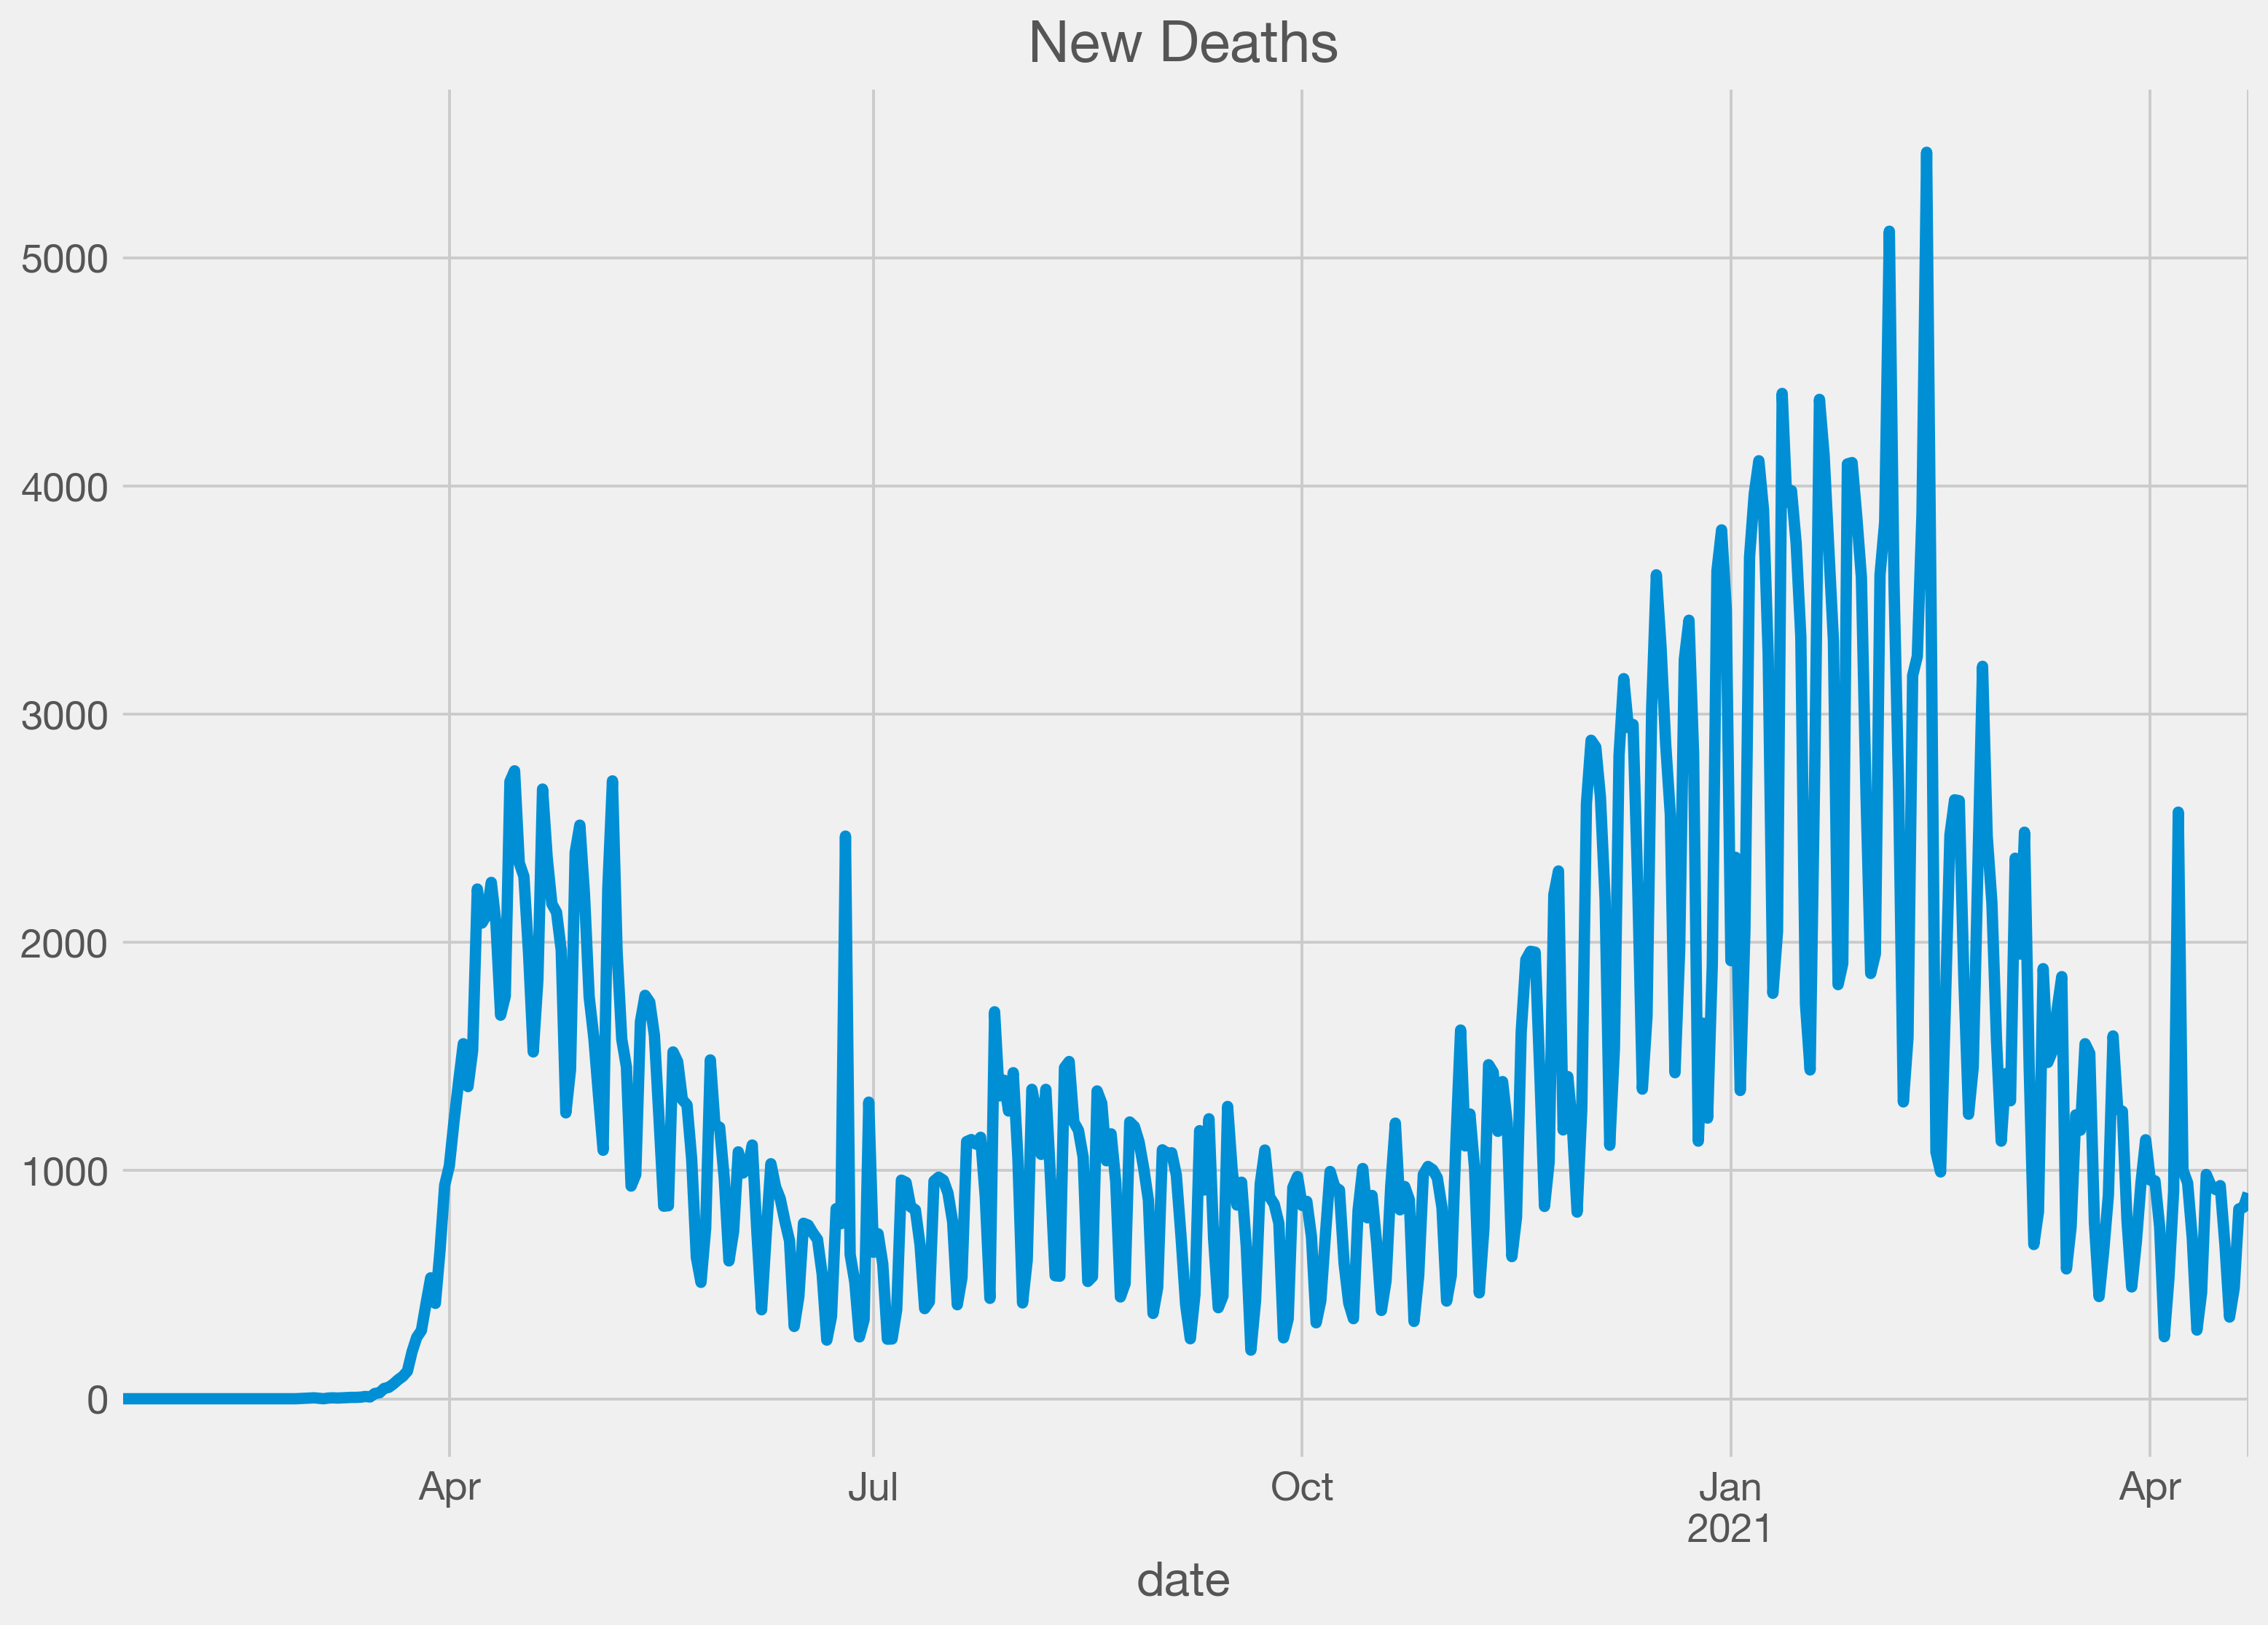

In [63]:
us["deaths"].diff().plot(title="New Deaths", figsize=(12, 8))

<AxesSubplot:title={'center':'New Cases in the US'}, xlabel='date'>

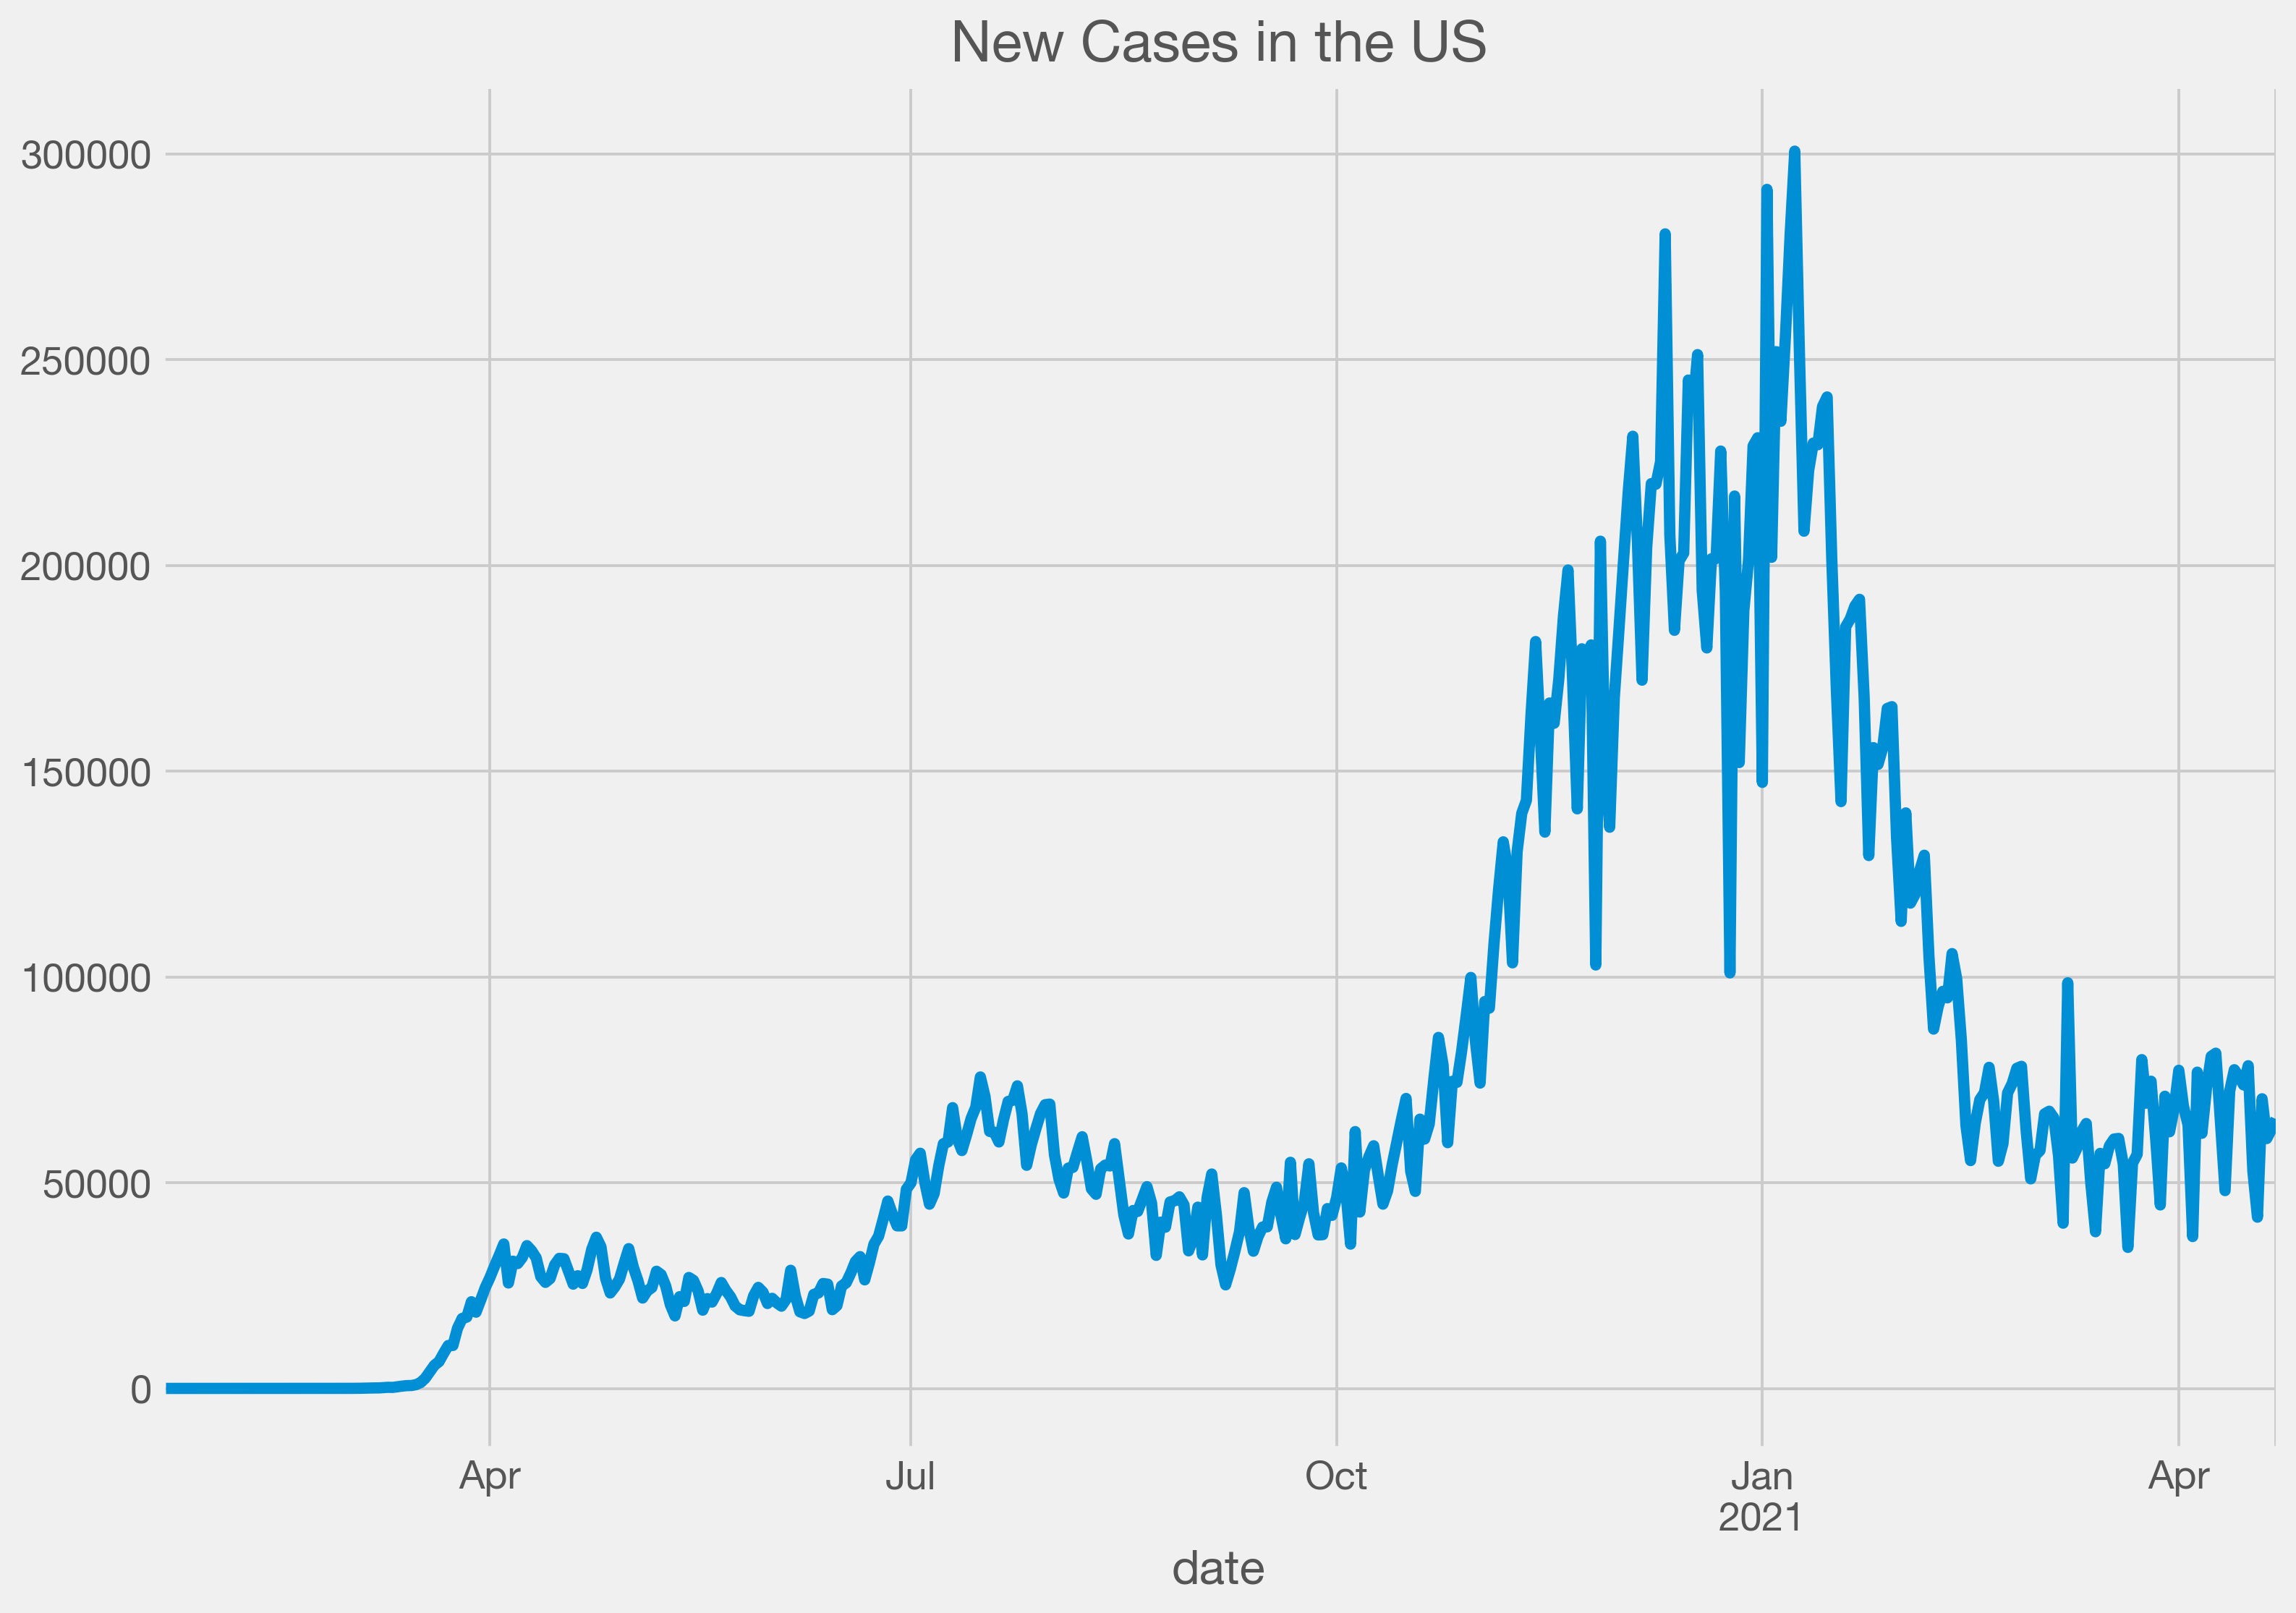

In [62]:
us["new_cases"].plot(title="New Cases in the US", figsize=(12,8))

In [56]:
master_fl["new_cases"] = master_fl[["cases"]].diff()

In [39]:
master_fl = master_fl.set_index("date")

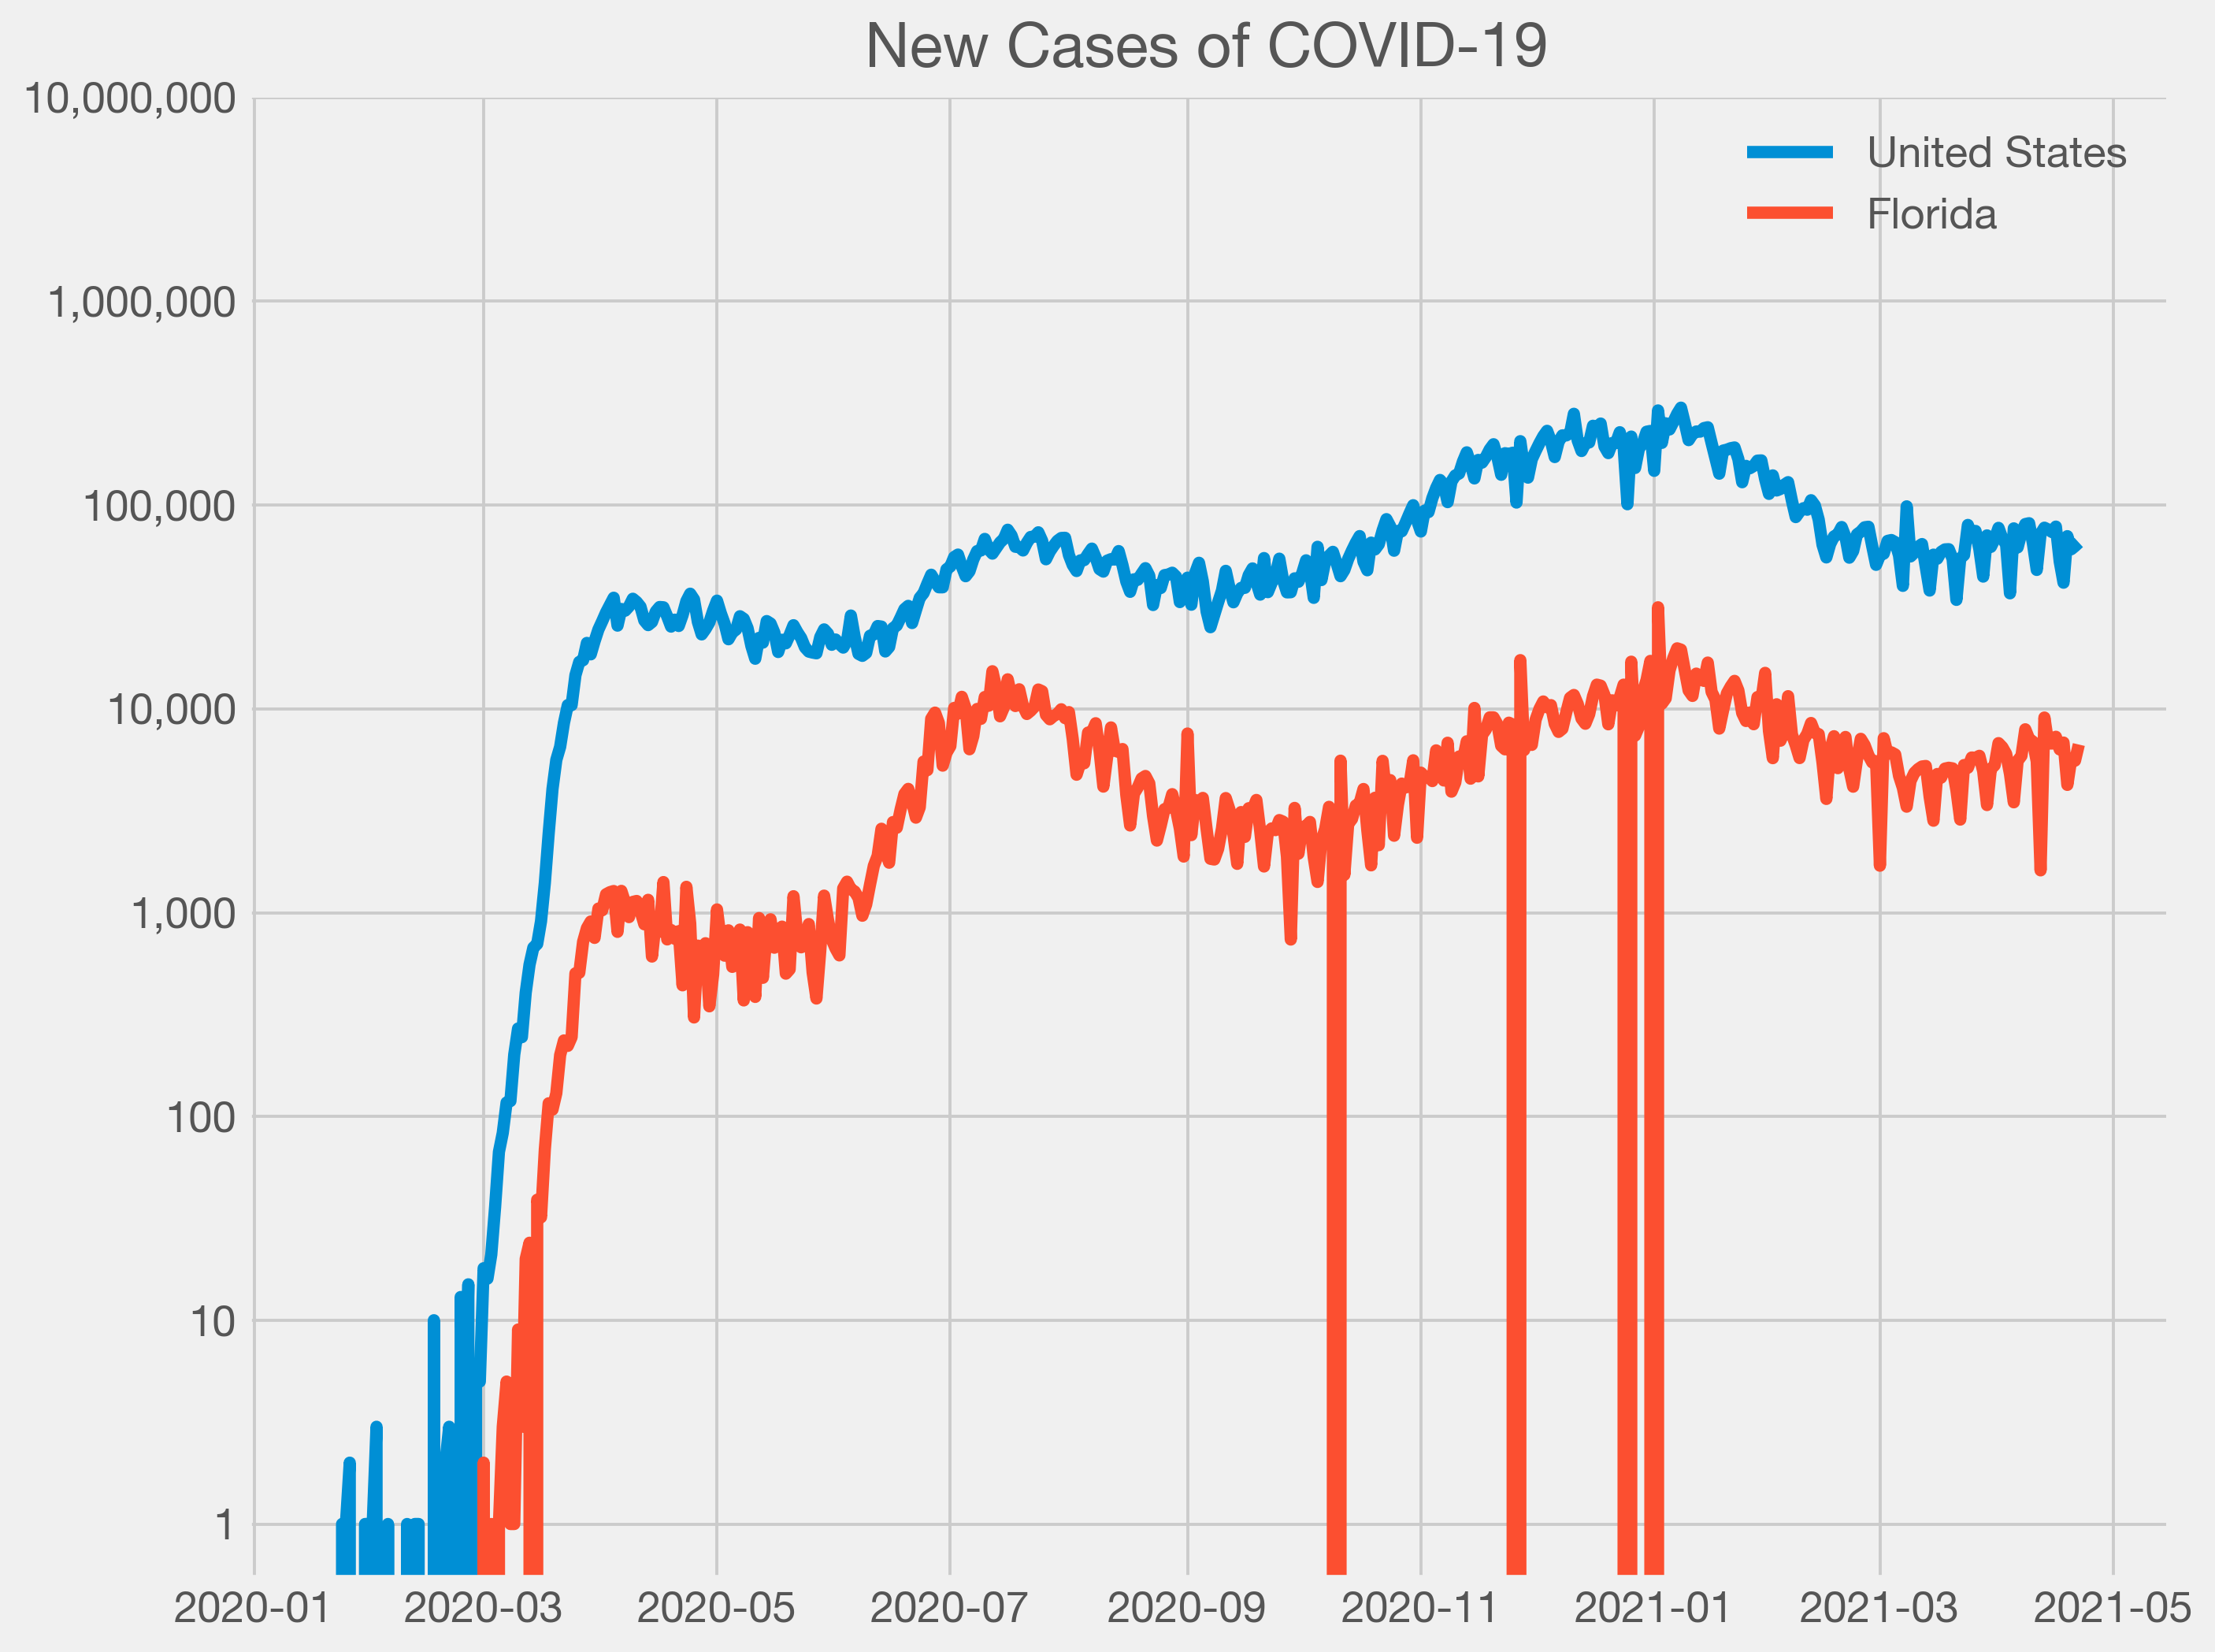

In [40]:
plt.figure(figsize=(10, 8))
plt.plot(us["new_cases"], label="United States")
plt.plot(master_fl["new_cases"], label="Florida")
plt.title("New Cases of COVID-19")
plt.yscale("log")
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14))
plt.yticks(ticks=(1, 10, 100, 1000, 10000, 100000, 1000000, 10000000), labels=numbers)
plt.legend()
plt.savefig("figures/new_cases.svg", bbox_inches="tight")
plt.show()

In [41]:
florida

2184354

In [42]:
florida = data_c.query("state == 'Florida'").sort_values(by=["county", "date"])
florida["new_cases"] = florida[["cases"]].diff()

florida.query("date == '2020-06-14'").sort_values(by="new_cases", ascending=False)

,date,county,state,fips,cases,deaths,new_cases
237388,2020-06-14,Palm Beach,Florida,12099.0,8831,426.0,391.0
237381,2020-06-14,Miami-Dade,Florida,12086.0,21916,825.0,284.0
237373,2020-06-14,Lee,Florida,12071.0,2835,132.0,202.0
237386,2020-06-14,Orange,Florida,12095.0,3129,45.0,193.0
237390,2020-06-14,Pinellas,Florida,12103.0,2235,102.0,132.0
...,...,...,...,...,...,...,...
237375,2020-06-14,Levy,Florida,12075.0,100,1.0,0.0
237361,2020-06-14,Hamilton,Florida,12047.0,271,2.0,0.0
237360,2020-06-14,Gulf,Florida,12045.0,8,0.0,0.0
237401,2020-06-14,Union,Florida,12125.0,38,1.0,-1.0


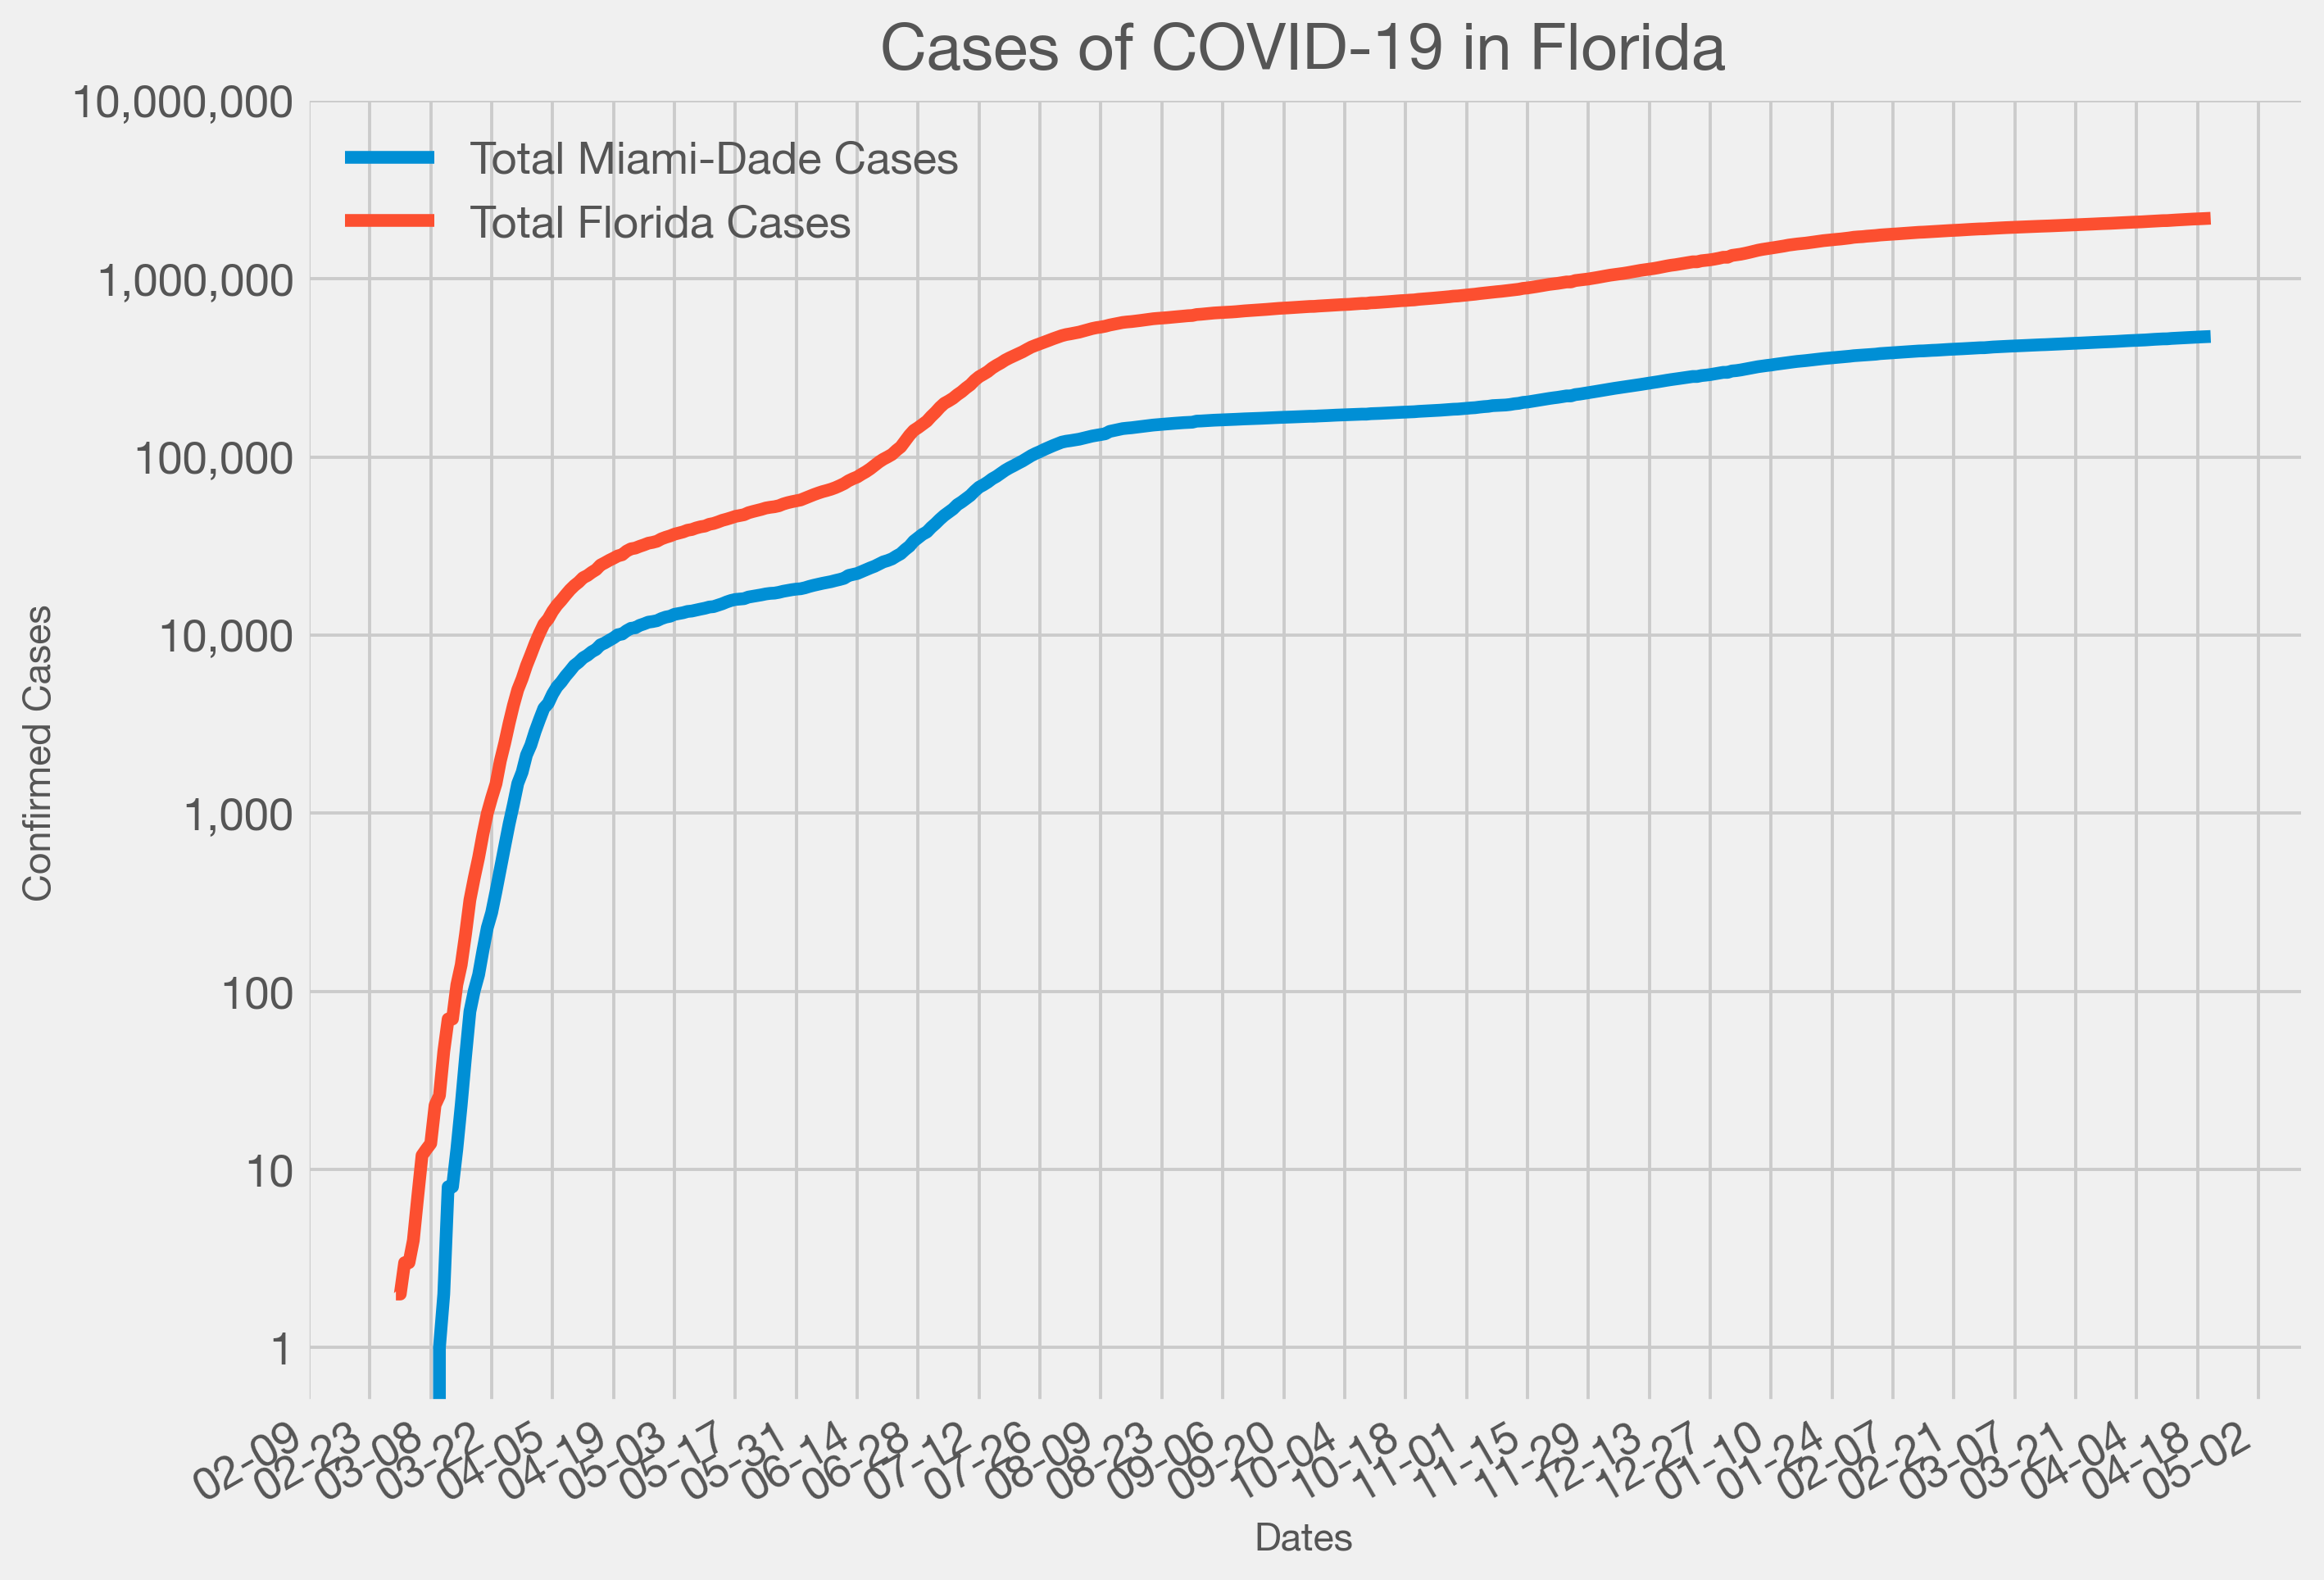

In [43]:
import datetime as dt

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, ScalarFormatter

# Plot the Data

plt.figure(figsize=(10, 8))

now = dt.datetime.now() - dt.timedelta(days=1)
start = now - dt.timedelta(days=len(dates))  # + dt.timedelta(days=1)
start_fl = dt.datetime(2020, 2, 29)
days = mdates.drange(start, now, dt.timedelta(days=1))
days_fl = mdates.drange(start_fl, now, dt.timedelta(days=1))

# formatter = FuncFormatter(log_10_product)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(formatter))
plt.yscale("log")
# formatter = FuncFormatter(log_10_product)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(formatter))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14))

plt.plot(
    days_fl, master_mdc["cases"].tail(len(days_fl)), label="Total Miami-Dade Cases"
)
plt.plot(days_fl, master_fl["cases"].tail(len(days_fl)), label="Total Florida Cases")
# plt.plot(days, master["cases"], label="Total US Cases")
plt.gcf().autofmt_xdate()

plt.title("Cases of COVID-19 in Florida")
plt.xlabel(r"Dates", fontsize=12)
plt.ylabel(r"Confirmed Cases", fontsize=12)
plt.yticks(ticks=(1, 10, 100, 1000, 10000, 100000, 1000000, 10000000), labels=numbers)


# plt.plot("date", "claims", label="Unemployment", data=master_f)
plt.legend()
plt.savefig("figures/fl_cases.svg", bbox_inches="tight")
plt.show()

In [44]:
florida = data_c.query("state == 'Florida'").reset_index(drop=True)

In [45]:
florida = florida.sort_values(by=["county", "date"]).reset_index(drop=True)

In [46]:
florida["new_cases"] = florida.cases.diff()

In [47]:
june_fl = florida.query("date >= '2020-06-01'")

In [48]:
# june_fl[["date", "county", "new_cases"]].sort_values(
#     by=["new_cases", "date"], ascending=False
# ).set_index("county").groupby("county").plot()

In [49]:
import datetime

import pandas_datareader as pdr

start = datetime.datetime(2020, 3, 21)

icsa = pdr.get_data_fred("ICSA", start, today)
# icsa = pdr.DataReader("ICSA", "fred", start, today)

icsa

,ICSA
DATE,
2020-03-21,2923000
2020-03-28,5985000
2020-04-04,6149000
2020-04-11,4869000
2020-04-18,4202000
2020-04-25,3451000
2020-05-02,2784000
2020-05-09,2315000
2020-05-16,2149000


<AxesSubplot:title={'center':'Initial Weekly Unemployment Claims\n in the United States'}, xlabel='DATE'>

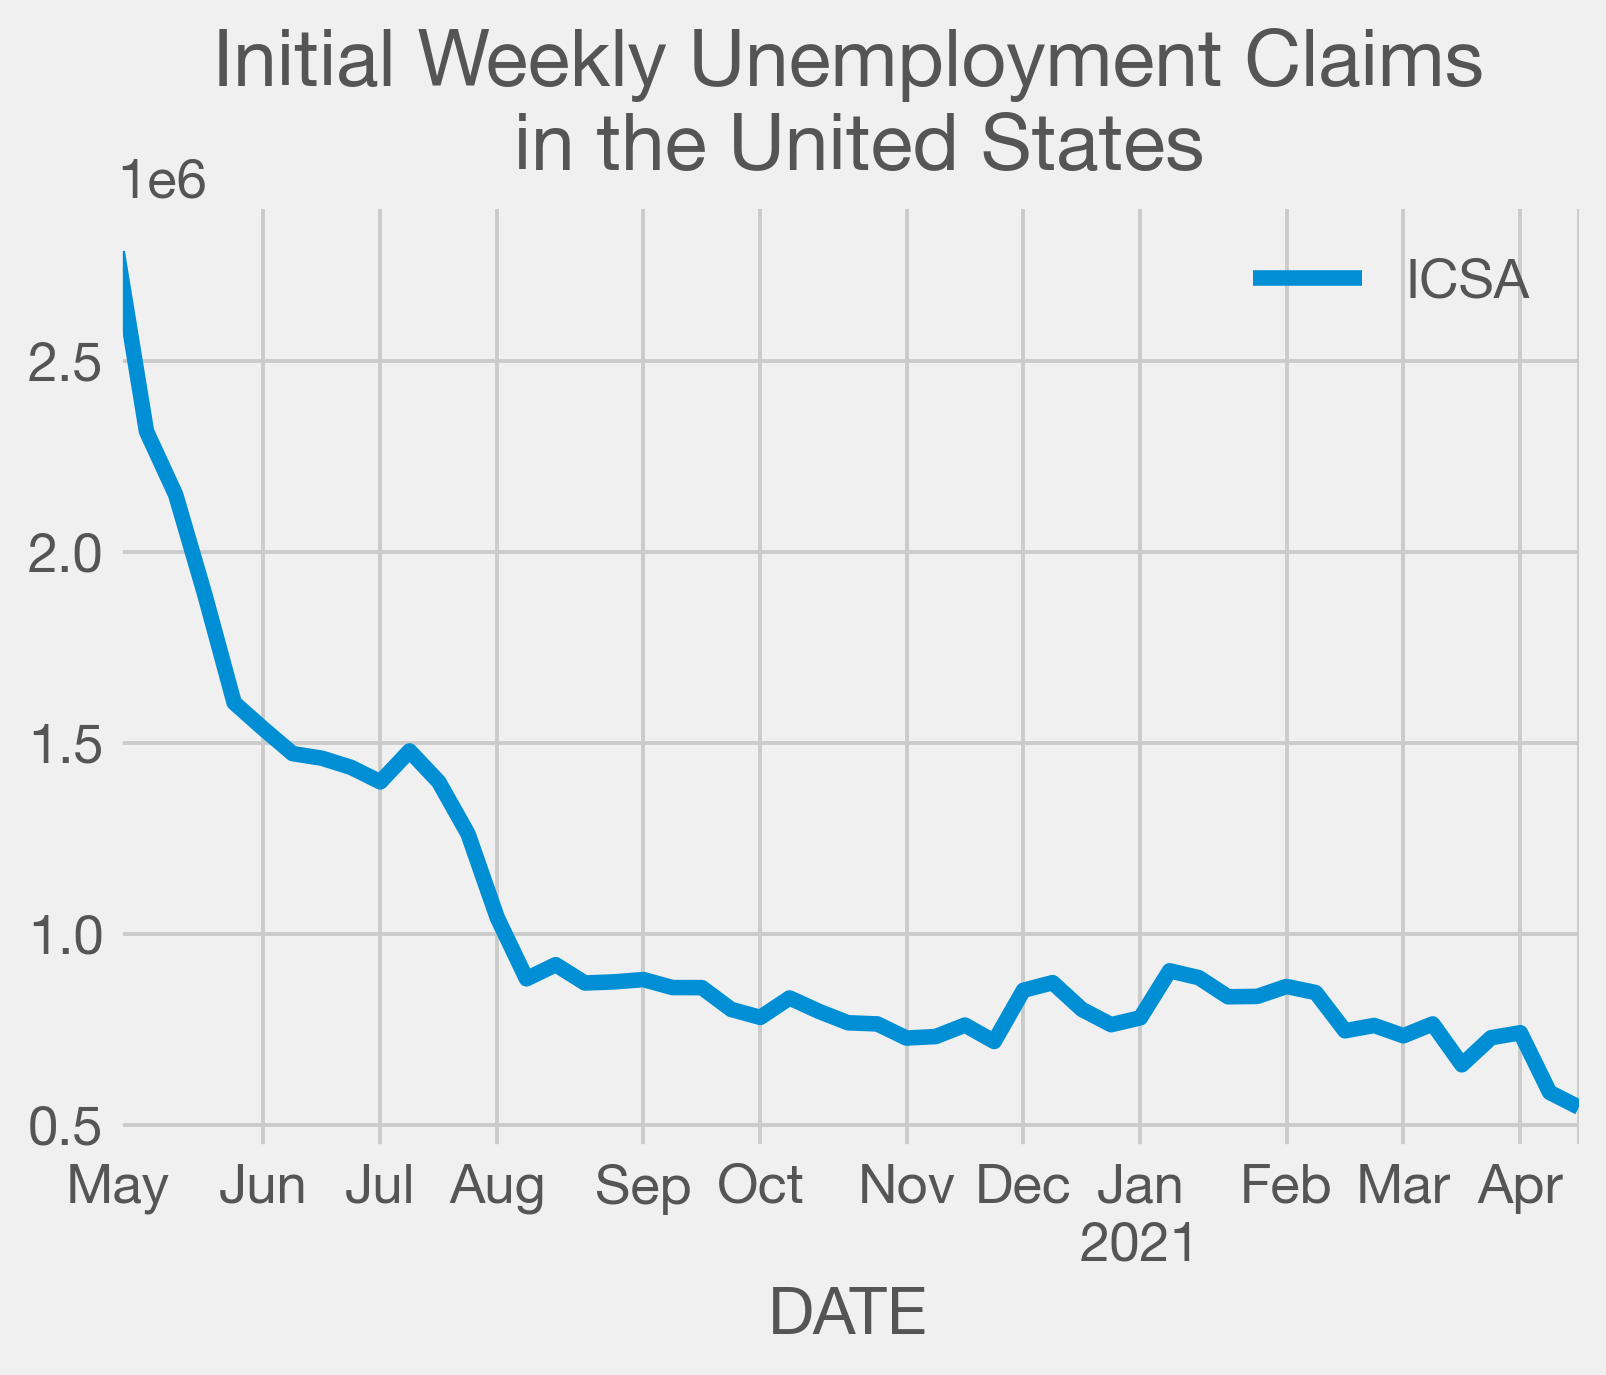

In [59]:
pdr.get_data_fred("ICSA", "05/01/2020", today).plot(
    title="Initial Weekly Unemployment Claims\n in the United States"
)